In [1]:
!wget https://raw.githubusercontent.com/Dewasurya16/Dataset-Sentiment-/main/Dataset%20Instagram%20Sentiment.csv

--2022-12-15 16:59:12--  https://raw.githubusercontent.com/Dewasurya16/Dataset-Sentiment-/main/Dataset%20Instagram%20Sentiment.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61158 (60K) [text/plain]
Saving to: ‘Dataset Instagram Sentiment.csv’

Dataset Instagram S 100%[===================>]  59.72K  --.-KB/s    in 0.006s  

2022-12-15 16:59:13 (10.4 MB/s) - ‘Dataset Instagram Sentiment.csv’ saved [61158/61158]



In [2]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 13.5 MB/s 


In [4]:
import pandas as pd
df=pd.read_csv('/content/Dataset Instagram Sentiment.csv')
df.head()

,Sentiment,teks
0,0,<USERNAME> TOLOL!! Gak ada hubungan nya kegugu...
1,0,Geblek lo tata...cowo bgt dibela2in balikan......
2,0,Kmrn termewek2 skr lengket lg duhhh kok labil ...
3,0,"Intinya kalau kesel dengan ATT nya, gausah ke ..."
4,0,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha..."


In [5]:
columns=df.columns
columns

Index(['Sentiment', 'teks'], dtype='object')

In [6]:
import re

def text_preprocessing(text):
  text = text.lower()                               # Mengubah teks menjadi lower case
  text = re.sub(r'https?://\S+|www\.\S+', '', text) # Menghapus URL
  text = re.sub(r'[-+]?[0-9]+', '', text)           # Menghapus angka
  text = re.sub(r'[^\w\s]','', text)                # Menghapus karakter tanda baca
  text = text.strip()                               # Menghapus whitespaces
  return text

In [7]:
# Buat fungsi untuk langkah stopword removal
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stopwords_ind = stopwords.words('indonesian')

more_stopword = ['tolong', 'nang', 'yg', 'film', 'filmnya', 'indonesia', 'bapak', 'tonton',
                'ya', 'dgn', 'kali', 'kisah', 'nntn', 'si', 'harga', 'salah', 'aktor', 'ah', 'furiousmenurutku',
                'cerita', 'actingnya', 'beexkuanlin', 'arthur', 'yah', 'radityadika', 'ale', 'bioskop', 'gambar', 'serakah',
                'kartini', 'nonton', 'baca', 'hansdavidian', 'bangsa', 'this', 'themummy', 'gila', 'kawin',
                'danur', 'meantweets', 'biografi', 'orang', 'hanungbramantyo', 'ttg', 'bayar', 'filmziarah', 'banget',
                'guys', 'cinta', 'bikin', 'ngomong', 'bilang', 'filmziarah', 'alien', 'gwa', 'bapak', 'critical', 'eleven', 'criticaleleven',
                'danur', 'danurmovie', 'horor', 'filmkartini', 'mbah', 'lihat', 'habis', 'bang', 'dihabisken', 'datar', 'potong', 'rilis',
                'beda', 'duh', 'parah', 'ziarah', 'hasil', 'cenanyangflm', 'main', 'nya', 'sejarah', 'perang'
                'dapet']                    # Tambahkan kata dalam daftar stopword
stopwords_ind = stopwords_ind + more_stopword

def remove_stop_words(text):
  clean_words = []
  text = text.split()
  for word in text:
      if word not in stopwords_ind:
          clean_words.append(word)
  return " ".join(clean_words)

In [8]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Buat fungsi untuk langkah stemming bahasa Indonesia
def stemming(text):
  text = stemmer.stem(text)
  return text

In [9]:
def tokenize(column):
    tokens = nltk.word_tokenize(column)
    return [w for w in tokens if w.isalpha()]    
    df['tokenized'] = df.apply(lambda x: tokenize(x['teks']), axis=1)
    df[['tokenized']].head()

In [10]:
raw_sample = df['teks'].iloc[5]
case_folding = text_preprocessing(raw_sample)
stopword_removal = remove_stop_words(case_folding)
text_stemming = stemming(stopword_removal)
token = tokenize(text_stemming)

print('Raw data\t\t: ', raw_sample)
print('Case folding\t\t: ', case_folding)
print('Stopword removal\t: ', stopword_removal)
print('Stemming\t\t: ', text_stemming)
print('Tokenizer\t\t: ', token)

Raw data		:  Pantesan di tinggalin laki, ya lakinya juga mikir kali kalau perempuannya kayagni. Ngurus diri aja dia gak becus gimana ngurus anak, mending anak sama bapake nya aja bener didiknya
Case folding		:  pantesan di tinggalin laki ya lakinya juga mikir kali kalau perempuannya kayagni ngurus diri aja dia gak becus gimana ngurus anak mending anak sama bapake nya aja bener didiknya
Stopword removal	:  pantesan tinggalin laki lakinya mikir perempuannya kayagni ngurus aja gak becus gimana ngurus anak mending anak bapake aja bener didiknya
Stemming		:  pantesan tinggalin laki laki mikir perempuan kayagni ngurus aja gak becus gimana ngurus anak mending anak bapake aja bener didik
Tokenizer		:  ['pantesan', 'tinggalin', 'laki', 'laki', 'mikir', 'perempuan', 'kayagni', 'ngurus', 'aja', 'gak', 'becus', 'gimana', 'ngurus', 'anak', 'mending', 'anak', 'bapake', 'aja', 'bener', 'didik']


In [11]:
def tokenize(column):
    tokens = nltk.word_tokenize(column)
    return [w for w in tokens if w.isalpha()]    

In [12]:
df['tokenized'] = df.apply(lambda x: tokenize(x['teks']), axis=1)
df[['tokenized']].head()


,tokenized
0,"[USERNAME, TOLOL, Gak, ada, hubungan, nya, keg..."
1,"[Geblek, lo, tata, cowo, bgt, balikan, hadeww,..."
2,"[Kmrn, skr, lengket, lg, duhhh, kok, labil, bg..."
3,"[Intinya, kalau, kesel, dengan, ATT, nya, gaus..."
4,"[hadewwwww, permpuan, itu, lg, sakit, jiwa, kn..."


In [13]:
def text_preprocessing_process(text):
  text = text_preprocessing(text)
  text = remove_stop_words(text)
  text = stemming(text)
  text = tokenize(text)
  return text

In [14]:
%time df['teks'] = df['teks'].apply(text_preprocessing_process)

CPU times: user 3min 27s, sys: 753 ms, total: 3min 28s
Wall time: 3min 33s


In [15]:
df

,Sentiment,teks,tokenized
0,0,"[username, tolol, gak, hubung, gugur, pake, hi...","[USERNAME, TOLOL, Gak, ada, hubungan, nya, keg..."
1,0,"[geblek, lo, tatacowo, bgt, bain, balikanhadew...","[Geblek, lo, tata, cowo, bgt, balikan, hadeww,..."
2,0,"[kmrn, mewek, skr, lengket, lg, duhhh, labil, ...","[Kmrn, skr, lengket, lg, duhhh, kok, labil, bg..."
3,0,"[inti, kesel, att, gausah, anak, kasi, kembang...","[Intinya, kalau, kesel, dengan, ATT, nya, gaus..."
4,0,"[hadewwwww, permpuan, lgsakit, jiwaknp, jd, pe...","[hadewwwww, permpuan, itu, lg, sakit, jiwa, kn..."
...,...,...,...
395,1,"[bangga, suami, istri, sela, apa, profesi, kau...","[Bangga, sama, suami, yg, selalu, ingat, istri..."
396,1,"[apaoun, kerja, halal, u, tuk, nafkah, keluarg...","[Apaoun, pekerjaannya, yg, penting, halal, u, ..."
397,1,"[gojek, mayoritas, pegangguran, gak, kerja, tr...","[Gojek, itu, mayoritas, pegangguran, yang, lam..."
398,1,"[username, asli, cantik, ayu, loh, mbak, krn, ...","[USERNAME, aslinya, cantik, dan, ayu, loh, mba..."


In [16]:
y=df['Sentiment']

In [17]:
from sklearn.model_selection import train_test_split
df_train,df_test,y_train,y_test=train_test_split(df['teks'],y,test_size=0.33,random_state=42)
print('DF Train Shape: ',df_train.shape)
print('DF Test Shape: ',df_test.shape)
print('Y Train Shape: ',y_train.shape)
print('Y Test Shape: ',y_test.shape)

DF Train Shape:  (268,)
DF Test Shape:  (132,)
Y Train Shape:  (268,)
Y Test Shape:  (132,)


In [18]:
from tensorflow.keras.preprocessing.text import Tokenizer
max_words=10000
tokenizer=Tokenizer(max_words)
tokenizer.fit_on_texts(df_train)
sequence_train=tokenizer.texts_to_sequences(df_train)
sequence_test=tokenizer.texts_to_sequences(df_test)


In [19]:
word2vec=tokenizer.word_index
V=len(word2vec)
print('dataset has %s number of independent tokens' %V)

dataset has 2038 number of independent tokens


In [20]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
data_train=pad_sequences(sequence_train)
data_train.shape

(268, 105)

In [21]:
T=data_train.shape[1]
data_test=pad_sequences(sequence_test,maxlen=T)
data_test.shape

(132, 105)

In [22]:
from tensorflow.keras.layers import Input,Conv1D,MaxPooling1D,Dense,GlobalMaxPooling1D,Embedding
from tensorflow.keras.models import Model

In [23]:
D=20
i=Input((T,))
x=Embedding(V+1,D)(i)
x=Conv1D(32,3,activation='relu')(x)
x=MaxPooling1D(3)(x)
x=Conv1D(64,3,activation='relu')(x)
x=MaxPooling1D(3)(x)
x=Conv1D(128,3,activation='relu')(x)
x=GlobalMaxPooling1D()(x)
x=Dense(2,activation='softmax')(x)
model=Model(i,x)
model.summary()



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 105)]             0         
                                                                 
 embedding (Embedding)       (None, 105, 20)           40780     
                                                                 
 conv1d (Conv1D)             (None, 103, 32)           1952      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 34, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 32, 64)            6208      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 10, 64)           0         
 1D)                                                         

In [24]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
cnn_senti=model.fit(data_train,y_train,validation_data=(data_test,y_test),epochs=5,batch_size=100)

Epoch 1/5
3/3 [==============================] - 8s 211ms/step - loss: 0.6937 - accuracy: 0.4664 - val_loss: 0.6929 - val_accuracy: 0.4848
Epoch 2/5
3/3 [==============================] - 0s 19ms/step - loss: 0.6903 - accuracy: 0.6269 - val_loss: 0.6914 - val_accuracy: 0.6136
Epoch 3/5
3/3 [==============================] - 0s 15ms/step - loss: 0.6879 - accuracy: 0.6269 - val_loss: 0.6900 - val_accuracy: 0.6136
Epoch 4/5
3/3 [==============================] - 0s 17ms/step - loss: 0.6841 - accuracy: 0.6455 - val_loss: 0.6881 - val_accuracy: 0.6364
Epoch 5/5
3/3 [==============================] - 0s 17ms/step - loss: 0.6789 - accuracy: 0.6567 - val_loss: 0.6855 - val_accuracy: 0.6364


In [25]:
y_pred=model.predict(data_test)
y_pred

5/5 [==============================] - 0s 15ms/step


array([[0.48295972, 0.5170403 ],
       [0.48295972, 0.5170403 ],
       [0.5160938 , 0.4839062 ],
       [0.48295972, 0.5170403 ],
       [0.48295972, 0.5170403 ],
       [0.54074454, 0.45925546],
       [0.4942224 , 0.5057776 ],
       [0.52669257, 0.4733075 ],
       [0.50360775, 0.49639225],
       [0.48531887, 0.5146811 ],
       [0.48295972, 0.5170403 ],
       [0.48702312, 0.51297694],
       [0.52372503, 0.4762749 ],
       [0.4931862 , 0.5068138 ],
       [0.501868  , 0.498132  ],
       [0.48871046, 0.51128954],
       [0.49336982, 0.5066302 ],
       [0.48586702, 0.514133  ],
       [0.48413464, 0.5158654 ],
       [0.48295972, 0.5170403 ],
       [0.48295972, 0.5170403 ],
       [0.5299328 , 0.4700672 ],
       [0.48295972, 0.5170403 ],
       [0.48295972, 0.5170403 ],
       [0.5024071 , 0.49759293],
       [0.48295972, 0.5170403 ],
       [0.5165778 , 0.48342222],
       [0.4854735 , 0.51452655],
       [0.48295972, 0.5170403 ],
       [0.48295972, 0.5170403 ],
       [0.

In [26]:
testkata = 'pemerintah yang buruk di kacau 1023 !'
prepro=text_preprocessing(testkata)
print(prepro)

sequence_testing=tokenizer.texts_to_sequences(prepro)

print(len(sequence_testing))
data_testing=pad_sequences(sequence_testing,maxlen=T)
print(data_testing.shape)
pred=model.predict(data_testing)
pred


pemerintah yang buruk di kacau
30
(30, 105)
1/1 [==============================] - 0s 70ms/step


array([[0.48295972, 0.5170403 ],
       [0.48295972, 0.5170403 ],
       [0.48295972, 0.5170403 ],
       [0.48295972, 0.5170403 ],
       [0.48295972, 0.5170403 ],
       [0.48295972, 0.5170403 ],
       [0.48295972, 0.5170403 ],
       [0.48295972, 0.5170403 ],
       [0.48295972, 0.5170403 ],
       [0.48295972, 0.5170403 ],
       [0.48295972, 0.5170403 ],
       [0.48295972, 0.5170403 ],
       [0.48295972, 0.5170403 ],
       [0.48295972, 0.5170403 ],
       [0.48295972, 0.5170403 ],
       [0.48295972, 0.5170403 ],
       [0.48295972, 0.5170403 ],
       [0.48295972, 0.5170403 ],
       [0.48295972, 0.5170403 ],
       [0.48295972, 0.5170403 ],
       [0.48295972, 0.5170403 ],
       [0.48295972, 0.5170403 ],
       [0.48295972, 0.5170403 ],
       [0.48295972, 0.5170403 ],
       [0.48295972, 0.5170403 ],
       [0.48295972, 0.5170403 ],
       [0.48295972, 0.5170403 ],
       [0.48295972, 0.5170403 ],
       [0.48295972, 0.5170403 ],
       [0.48295972, 0.5170403 ]], dtype=flo

In [27]:
y_pred.shape
data_test.shape

(132, 105)

In [28]:
import numpy as np
y_pred=np.argmax(y_pred,axis=1)
y_pred

array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1])

In [29]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

Text(33.0, 0.5, 'y_pred')

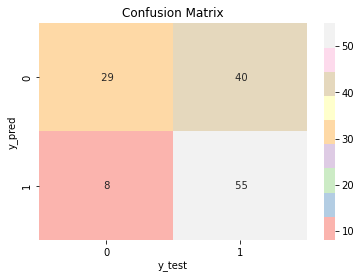

In [30]:
cm=confusion_matrix(y_test,y_pred)
ax=sns.heatmap(cm,annot=True,cmap='Pastel1',fmt=' ')
ax.set_title('Confusion Matrix')
ax.set_xlabel('y_test')
ax.set_ylabel('y_pred')

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.42      0.55        69
           1       0.58      0.87      0.70        63

    accuracy                           0.64       132
   macro avg       0.68      0.65      0.62       132
weighted avg       0.69      0.64      0.62       132

